151


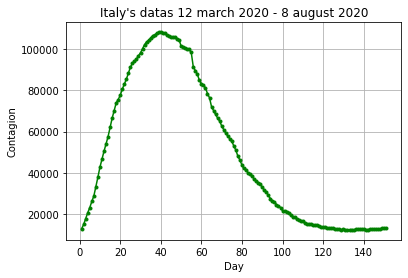

In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
from scipy.stats import poisson
import statistics






x=[]
y=[]


#leggo i dati 
for line in open('daticoviditalia.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(int(lines[1]))
    y.append(int(lines[0]))
    
for i in range(0,151):
    x[i]=x[i]-17
print(len(x))
#std=statistics.stdev(y)
#plot dei nuovi positivi nel periodo considerato
plt.title("Italy's datas 12 march 2020 - 8 august 2020")
plt.xlabel('Day')
plt.ylabel('Contagion')
plt.plot(x, y, marker = '.', c = 'g')
plt.grid()
plt.show()

In [22]:
#Gompertz

def Gomp(i,K,r,x0):
    c=np.log(1./K)
    g=K*np.exp(c*np.exp(-r*np.array(x[i]-x0)))
    return g


#differenze finite Gompertz
def diff_Gomp(i,K,r,x0):
    h = Gomp(x[i+1],K,r,x0)-Gomp(x[i],K,r,x0)
    return h

In [35]:
#definisco la funzione che calcola la log-likelihood 
def likelihood(x,y,theta):
    K, r, x0 = theta

    l=[None]*150
    z=[None]*150
    #poisson.pmf(k,m) 
    for i in range(0,150):
        z[i]=poisson.pmf(y[i],diff_Gomp(x[i],K,r,x0))
        l[i]=np.log(z[i])
    return np.nansum(l)

In [42]:
#definisco un flat (uninformative) prior sui parametri
def log_prior(theta):
    K, r, x0 = theta
    if x0 < 0. and r >0. and K>0.:
        return 0.0
    return -np.inf


def log_pos(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + likelihood(x,y,theta)

theta = [1000000, 0.5 , -17]


print(log_pos(theta,x,y))

-inf


In [36]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_pos(*args)
initial = theta
soln = minimize(nll, initial, args=(x, y))
print(soln.x)

C:\Users\marco\AppData\Local\Temp\ipykernel_26728\4152486654.py:11: RuntimeWarning: divide by zero encountered in log
  l[i]=np.log(z[i])


IndexError: list index out of range

IndexError: list index out of range

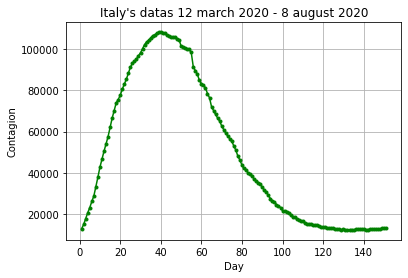

In [37]:
plt.title("Italy's datas 12 march 2020 - 8 august 2020")
plt.xlabel('Day')
plt.ylabel('Contagion')
plt.plot(x, y, marker = '.', c = 'g')
plt.grid()
ny = np.zeros(150)
for i in range(150):
    ny[i] = diff_Gomp(i,*soln.x)
plt.plot(x[:-1],ny,'r')
plt.show()

In [27]:
import emcee

pos = soln.x * (1.+1e-2* np.random.randn(16, 3))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_pos, args=(x,y))
sampler.run_mcmc(pos, 2000, progress=True);

emcee: Exception while calling your likelihood function:
  params: [ 1.23019846e+05  3.98999045e-02 -2.72290392e+01]
  args: ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151], [12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013, 66414, 70065, 73880, 75528, 77635, 80572, 83049, 85388, 88274, 91246, 93187, 94067, 95262, 96877, 98273, 100269, 102253

C:\Users\marco\AppData\Local\Temp\ipykernel_26728\2020623780.py:14: RuntimeWarning: divide by zero encountered in log
  l[i]=np.log(z[i])
Traceback (most recent call last):
  File "C:\Users\marco\anaconda3\lib\site-packages\emcee\ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "C:\Users\marco\AppData\Local\Temp\ipykernel_26728\1132058285.py", line 13, in log_pos
    return lp + likelihood(x,y,theta)
  File "C:\Users\marco\AppData\Local\Temp\ipykernel_26728\2020623780.py", line 13, in likelihood
    z[i]=poisson.pmf(y[i],diff_Gomp(x[i],K,r,x0))
  File "C:\Users\marco\AppData\Local\Temp\ipykernel_26728\4080215743.py", line 11, in diff_Gomp
    h = Gomp(x[i+1],K,r,x0)-Gomp(x[i],K,r,x0)
  File "C:\Users\marco\AppData\Local\Temp\ipykernel_26728\4080215743.py", line 5, in Gomp
    g=K*np.exp(c*np.exp(-r*np.array(x[i]-x0)))
IndexError: list index out of range


IndexError: list index out of range